# k-means Clustering of Book Ratings

## Dataset overview
The dataset has two files. We'll import them both into pandas dataframes:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
import helper

# Import the Books dataset
books = pd.read_csv('datasets/books.csv')

# Show first 5 rows of books dataset
books.head()

,book_id,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249.0
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613.0
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390.0
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272.0
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964.0


In [2]:
print('The dataset cointains', len(books), 'books.')

The dataset cointains 13719 books.


In [3]:
# Import the Books dataset including genres
data = pd.read_csv('datasets/books_genres.csv')
df = data[['book_id','title','authors','average_rating','ratings_count','text_reviews_count','genre']]

# Remove books with empty genre
books_genres = df.dropna(subset=['genre'])
len(books_genres)

# Show first 5 rows of books dataset
books_genres.head()

,book_id,title,authors,average_rating,ratings_count,text_reviews_count,genre
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,1944099,26249,Juvenile Fiction
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,1996446,27613,Juvenile Fiction
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,5629932,70390,Juvenile Fiction
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,6267,272,Juvenile Fiction
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,2149872,33964,Juvenile Fiction


In [4]:
print('The dataset cointains', len(books_genres), 'books with assigned genres.')

The dataset cointains 10007 books with assigned genres.


In [5]:
# Select books with average ratings
high_ratings = books_genres['average_rating'] > 4.7
good_ratings = books_genres['average_rating'] > 4
above_low_ratings = books_genres['average_rating'] > 3.5
low_ratings = books_genres['average_rating'] < 3

books_high_ratings = books_genres[high_ratings]
books_high_ratings.head(10)

,book_id,title,authors,average_rating,ratings_count,text_reviews_count,genre
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPré,4.78,38872,154,Juvenile Fiction
7,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,27410,820,Juvenile Fiction
441,1332,Parmenides/Philebus/Symposium/Phaedrus/Alcibia...,Plato-John Burnet-Hipparchus,4.87,15,0,Literary Criticism
879,2560,Willem de Kooning: Late Paintings,Julie Sylvester-David Sylvester,5.00,1,0,Art
903,2680,Empire 2.0: A Modest Proposal for a United Sta...,Xavier de C.-Xavier de C.-Joseph Rowe,4.75,4,0,Political Science
963,2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.00,4,1,Education
1442,4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.00,2,0,History
2988,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,5.00,1,0,Spiritual life
4940,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.00,2,0,Games
5251,15705,Existential Meditation,Simon Cleveland,4.91,11,3,Existentialism


In [6]:
print('The dataset cointains', len(books_high_ratings), 'books with ratings higher than 4.7.')
print('The dataset cointains', len(books_genres[good_ratings]), 'books with ratings higher than 4.')
print('The dataset cointains', len(books_genres[above_low_ratings]), 'books with ratings higher than 3.5.')
print('The dataset cointains', len(books_genres[low_ratings]), 'books with ratings lower than 3.')

The dataset cointains 32 books with ratings higher than 4.7.
The dataset cointains 4264 books with ratings higher than 4.
The dataset cointains 9307 books with ratings higher than 3.5.
The dataset cointains 63 books with ratings lower than 3.


There are more than 10007 books in the dataset containing average ratings. The significant part of all ratings are above rating of 4 and only a few are rated below 3.

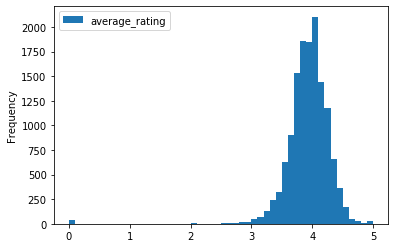

In [7]:
data.plot(kind = "hist", y = "average_rating", bins = 50, range = (0,5))

In [8]:
# Import the ratings dataset
ratings = pd.read_csv('datasets/ratings.csv')
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [9]:
print('The dataset contains', len(ratings), 'ratings of', len(books), 'all books.')

The dataset contains 5976479 ratings of 13719 all books.


In [10]:
# Ratings of books with assigned genres
books_ratings = ratings[ratings.book_id.isin(books_genres[['book_id']].values.flatten())]
print('The dataset contains', len(books_ratings), 'ratings of', len(books_genres), 'books with assigned genres.')

# Let's use only ratings that refer to books with assigned genres
original_ratings = ratings
ratings = books_ratings

The dataset contains 1911021 ratings of 10007 books with assigned genres.


Let's check the most frequenty rated books.

In [11]:
# Get the most frequenty rated books
ratings_count = ratings.groupby('book_id').count()[['user_id']]
ratings_count.sort_values('user_id', ascending=False).head()

,user_id
book_id,
1,22806
2,21850
4,19088
3,16931
5,16604


Let's check users who rated the most books with assigned genres.

In [12]:
# Get users who rated the highest number of books
ratings_count = ratings.groupby('user_id').count()[['book_id']]
ratings_count.sort_values('book_id', ascending=False).head()

,book_id
user_id,
11927,85
48687,82
12946,79
22243,78
24499,77


Let's take look at books rated by user with most number of ratings.

In [106]:
user_id = 11927
user_11927_ratings = ratings[(ratings.user_id == user_id)]
user_11927_sample_books = user_11927_ratings[['book_id']]
user_11927_rated_books = books_genres[books_genres['book_id'].isin(user_11927_sample_books.values.flatten())][['book_id','title','genre','average_rating']]

# Show user's rated books
user_11927_rated_books.sort_values('average_rating', ascending=False).head()

,book_id,title,genre,average_rating
7,10,Harry Potter Collection (Harry Potter #1-6),Juvenile Fiction,4.73
22,30,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,Fiction,4.59
0,1,Harry Potter and the Half-Blood Prince (Harry ...,Juvenile Fiction,4.56
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,Juvenile Fiction,4.55
27,36,The Lord of the Rings: Weapons and Warfare,Literary Criticism,4.53


In [107]:
# Let's merge books and ratings table
merged_tables = pd.merge(user_11927_rated_books, ratings[(ratings.user_id == user_id)], on='book_id')[['book_id','title','genre', 'rating','average_rating']]
merged_tables.sort_values(['rating','average_rating'], ascending=False).head(20)

,book_id,title,genre,rating,average_rating
4,10,Harry Potter Collection (Harry Potter #1-6),Juvenile Fiction,5,4.73
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,Juvenile Fiction,5,4.55
1,2,Harry Potter and the Order of the Phoenix (Har...,Juvenile Fiction,5,4.49
72,426,We Tell Ourselves Stories in Order to Live: Co...,Literary Collections,5,4.49
8,18,The Ultimate Hitchhiker's Guide (Hitchhiker's ...,Fiction,5,4.38
9,21,A Short History of Nearly Everything,Science,5,4.20
54,142,Ruby Ann's Down Home Trailer Park Cookbook,Cooking,5,4.09
12,24,In a Sunburned Country,True Crime,5,4.07
30,59,The Changeling Sea,Juvenile Fiction,5,4.07
13,25,I'm a Stranger Here Myself: Notes on Returning...,Biography & Autobiography,5,3.90


Let's remove some of the above ratings to see if the recommendation engine will suggest some of the books from the list:
[2,868]

In [15]:
#ratings[(ratings.user_id == user_id) & (ratings.book_id.isin([2,868]))].sort_values('rating', ascending=False)

In [16]:
#original_ratings = ratings
#ratings = ratings.drop([786715, 786673])

Let's remove ratings of the below books (row_id, book_id, title):

786502, 868, Fullmetal Alchemist Vol. 3

786505, 2, Harry Potter and the Order of the Phoenix

Let's check which genres contain the most of books.

In [17]:
genres_count = books_genres.groupby('genre').count()[['book_id']]
genres_count.sort_values('book_id', ascending=False).head(10)

,book_id
genre,
Fiction,3909
Juvenile Fiction,789
Biography & Autobiography,613
History,373
Literary Criticism,242
Comics & Graphic Novels,242
Philosophy,230
Drama,219
Religion,180


### Fiction vs Juvenile Fiction
Let's take a subset of users and see what their preferred genres are.

In [18]:
# Calculate the average rating of Fiction and Juvenile Fiction
genre_ratings = helper.get_genre_ratings(ratings, books_genres,
                                                   ['Fiction', 'Juvenile Fiction'],
                                                   ['avg_fiction_rating', 'avg_juv_fiction_rating'])
genre_ratings.head()

,avg_fiction_rating,avg_juv_fiction_rating
1,3.50,4.00
2,4.45,4.80
3,2.15,2.67
4,3.71,4.29
5,4.33,5.00


In [19]:
# Bias dataset
biased_dataset = helper.bias_genre_rating_dataset(genre_ratings, 3.2, 2.5).dropna()
print('Number of records:', len(biased_dataset))
biased_dataset.head()

Number of records: 302


,index,avg_fiction_rating,avg_juv_fiction_rating
0,3,2.15,2.67
1,8,3.21,3.00
2,12,3.75,3.17
3,14,2.92,4.00
4,16,3.69,3.00


So we have 302 users and for each of them we have average rating of the Fiction and Juvenile Fiction books they've read.

Let's plot this dataset.

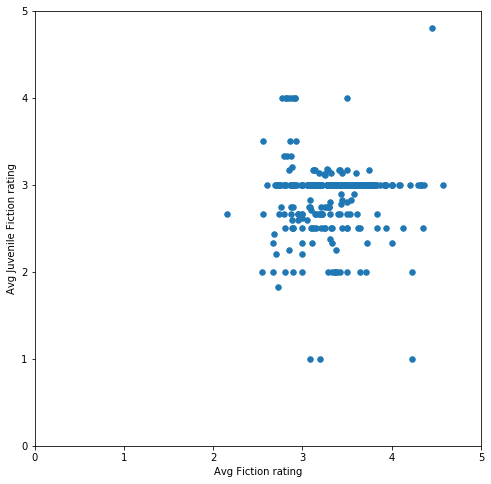

In [20]:
%matplotlib inline

helper.draw_scatterplot(biased_dataset['avg_fiction_rating'], 'Avg Fiction rating', biased_dataset['avg_juv_fiction_rating'], 'Avg Juvenile Fiction rating')

We can see clear bias in this sample. How would it look if we break the sample down into two groups using k-means?

In [21]:
# Turn dataset into a list
X = biased_dataset[['avg_fiction_rating','avg_juv_fiction_rating']].values

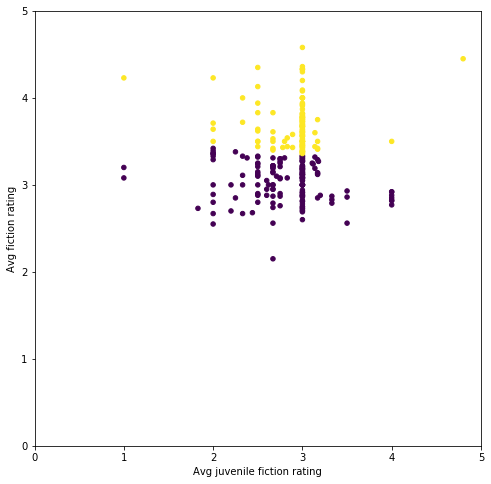

In [22]:
# Create an instance of KMeans to find 2 clusters
kmeans1 = KMeans(n_clusters=2)

# Use fit_predict to cluster the dataset
predictions1 = kmeans1.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions1)

We can see that the groups are mostly based on how each person rated fiction books. If their average rating of fiction books is over 3.3, then they belond to one group. Otherwise, they belond to other group.

Let's break them into 3 groups.

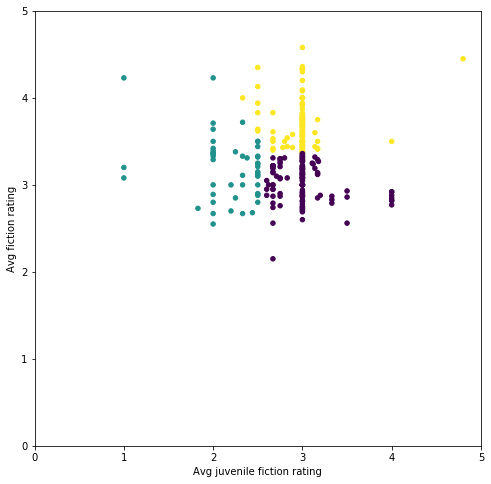

In [23]:
# Create an instance of KMeans to find 3 clusters
kmeans2 = KMeans(n_clusters=3)

# Use fit_predict to cluster the dataset
predictions2 = kmeans2.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions2)

Let's see how users rate the 3 most popular genres: Fiction, Juvenile Fiction and Biography & Autobiography.

In [24]:
# Calculate the average rating of Fiction, Juvenile Fiction and Biography & Autobiography genres
genre_ratings = helper.get_genre_ratings(ratings, books_genres,
                                                   ['Fiction', 'Juvenile Fiction', 'Biography & Autobiography'],
                                                   ['avg_fiction_rating', 'avg_juv_fiction_rating', 'avg_biography_rating'])
genre_ratings.head()

,avg_fiction_rating,avg_juv_fiction_rating,avg_biography_rating
1,3.50,4.00,3.00
2,4.45,4.80,5.00
3,2.15,2.67,1.67
4,3.71,4.29,3.33
5,4.33,5.00,5.00


Let's bias our dataset by removing users who like three genres: Fiction, Juvenile Fiction and Biography & Autobiography genres to make sure that our our clusters define them as liking one genre more than the other.

In [25]:
genre_ratings = helper.get_genre_ratings(ratings, books_genres,
                                                   ['Fiction', 'Juvenile Fiction', 'Biography & Autobiography'],
                                                   ['avg_fiction_rating', 'avg_juv_fiction_rating', 'avg_biography_rating'])
biased_dataset_3_genres = helper.bias_genre_rating_dataset(genre_ratings, 3.2, 2.5).dropna()
print('Number of records:', len(biased_dataset_3_genres))
biased_dataset_3_genres.head()

Number of records: 269


,index,avg_fiction_rating,avg_juv_fiction_rating,avg_biography_rating
0,3,2.15,2.67,1.67
1,8,3.21,3.00,3.50
2,12,3.75,3.17,3.50
3,14,2.92,4.00,3.50
4,16,3.69,3.00,4.00


In [26]:
X = biased_dataset_3_genres[['avg_fiction_rating', 'avg_juv_fiction_rating', 'avg_biography_rating']].values

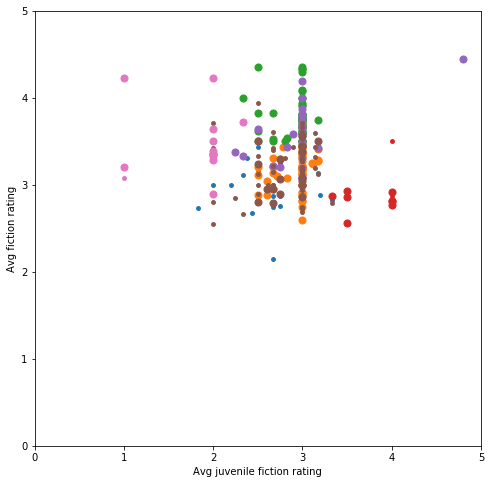

In [27]:
# Create an instance of KMeans to find seven clusters
kmeans3 = KMeans(n_clusters=7)

# Use fit_predict to cluster the dataset
predictions3 = kmeans3.fit_predict(X)

# Plot
helper.draw_clusters_3d(biased_dataset_3_genres, predictions3)

### Book-level Clustering
Now let's look at how users rated indiviudal books. To do that, we'll shape the dataset in the form of userIdvs user rating for each book.

In [28]:
# Merge two tables then pivot so we have Users x Books dataframe
ratings_title = pd.merge(ratings, books_genres[['book_id', 'title']], on='book_id')
user_book_ratings = pd.pivot_table(ratings_title, index='user_id', columns='title', values='rating')

print('dataset dimensions:', user_book_ratings.shape, '\n\nSubset example:')
user_book_ratings.iloc[:5, :10]

dataset dimensions: (53424, 2222) 

Subset example:


title,said the shotgun to the head.,'Salem's Lot,'Tis A Memoir (Frank McCourt #2),10 lb Penalty,100 Years of Lynchings,101 Stories of the Great Ballets: The Scene-by-Scene Stories of the Most Popular Ballets Old and New,1421: The Year China Discovered America,1776,1919 (U.S.A. #2),1968: The Year That Rocked the World
user_id,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dominance of NaN values shows the first issue. Most users have not rated and read most books. Datasets like this are called sparse because only a small number of cells have values.

The get around this, let's sort by the most rated books and the users who have rated the most number of books. That will present a more dense region when we peak at the top of the dataset.

If we're to choose the most-rated books vs users with most ratings, it would look like this:

In [79]:
n_books = 30
n_users = 18
most_rated_books_users_selection = helper.sort_by_rating_density(user_book_ratings, n_books, n_users)

print('dataset dimensions:', most_rated_books_users_selection.shape)
most_rated_books_users_selection.head()

dataset dimensions: (18, 30)


title,Harry Potter and the Half-Blood Prince (Harry Potter #6),Harry Potter and the Order of the Phoenix (Harry Potter #5),Harry Potter and the Chamber of Secrets (Harry Potter #2),The Lord of the Rings (The Lord of the Rings #1-3),The Known World,The Changeling,Anna Karenina,Harry Potter and the Sorcerer's Stone (Harry Potter #1),Harry Potter and the Prisoner of Azkaban (Harry Potter #3),The Ultimate Hitchhiker's Guide (Hitchhiker's Guide to the Galaxy #1-5),...,Harry Potter Collection (Harry Potter #1-6),The Lord of the Rings: Complete Visual Companion,The Lost Continent: Travels in Small Town America,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings,The Power of One (The Power of One #1),The Ultimate Hitchhiker's Guide: Five Complete Novels and One Story (Hitchhiker's Guide to the Galaxy #1-5),Bill Bryson's African Diary,The Mother Tongue: English and How It Got That Way,The Lord of the Rings: Weapons and Warfare,Agile Web Development with Rails: A Pragmatic Guide
41836,3.0,5.0,5.0,3.0,5.0,5.0,3.0,2.0,4.0,5.0,...,3.0,5.0,4.0,5.0,3.0,4.0,3.0,4.0,5.0,1.0
47302,4.0,4.0,4.0,3.5,2.5,4.0,3.0,3.0,4.0,4.0,...,3.0,4.0,4.0,3.0,3.0,3.0,NaN,4.0,4.0,2.0
12560,5.0,5.0,5.0,5.0,5.0,5.0,3.5,4.0,5.0,5.0,...,5.0,3.0,5.0,NaN,4.0,4.0,NaN,4.0,5.0,4.0
14410,5.0,5.0,4.0,5.0,4.0,3.0,3.0,4.0,4.0,5.0,...,5.0,NaN,4.0,3.0,NaN,5.0,3.0,3.0,5.0,4.0
4929,5.0,4.0,5.0,5.0,1.0,NaN,2.0,2.0,3.0,5.0,...,4.0,NaN,3.0,1.0,3.0,3.0,5.0,4.0,4.0,4.0


That's more like it. Let's also establish a good way for visualizing these ratings so we can attempt to visually recognize the ratings (and later, clusters) when we look at bigger subsets.

Let's use colors instead of the number ratings:

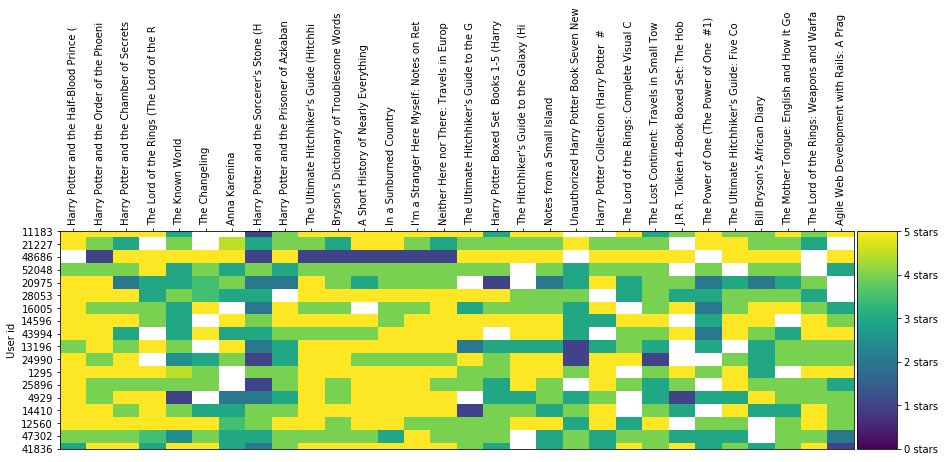

In [80]:
helper.draw_books_heatmap(most_rated_books_users_selection)

Each column is a book. Each row is a user. The color of the cell is how the user rated that book based on the scale on the right of the graph.

White cells mean that particular user did not rate a book. This is an issue because k-means generally does not like missing values.

For performance reasons, we'll only use ratings for 1000 books (out of the 10000+ available in the dataset).

In [81]:
user_book_ratings = pd.pivot_table(ratings_title, index='user_id', columns='title', values='rating')
most_rated_books_1k = helper.get_most_rated_books(user_book_ratings, 1000)

To have sklearn run k-means clustering to a dataset with missing values like this, we will first cast it to the sparse_csr_matrix type defined in the SciPi libary.

To convert from a pandas dataframe to a sparse matrix, we'll have to convert to SparseDataFrame, then use pandas to_coo() method for the conversion.

In [82]:
sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_books_1k).to_coo())

### Let's cluster
With k-means, we have to specify k, the number of clusters. To find the right number of clusters for this dataset I'll use "the elbow method". The elbow method works by plotting the ascending values of k versus the total error calculated using that k. One way to calculate the error is squared error. Say we are calculating the error for k=2. We'd have two clusters each having one "centroid" point. For each point in our dataset, we'd subtract its coordinates from the centroid of the cluster it belongs to. We then square the result of that subtraction (to get rid of the negative values), and sum the values. This would leave us with an error value for each point. If we sum these error values, we'd get the total error for all points when k=2.

Our mission is to do the same for each k (between 1 and say the number of elements in our dataset).

In [108]:
# Turn dataset into a list
X = biased_dataset_3_genres[['avg_fiction_rating', 'avg_juv_fiction_rating', 'avg_biography_rating']].values

# Choose the range of k values to test
# I added a stride of 5 to improve performance. There's no need to calculate the error for every k
possible_k_values = range(2, len(X)+1, 5)

# Calculate error values (MSE) for all k values in the given range
errors_per_k_mse = [helper.sparse_clustering_errors(k, X) for k in possible_k_values]

# Calculate silhouette score for all k values in the given range
errors_per_k = [helper.clustering_errors(k, X) for k in possible_k_values]

c:\users\lucky mario\appdata\local\programs\python\python36\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (249) found smaller than n_clusters (252). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\lucky mario\appdata\local\programs\python\python36\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (249) found smaller than n_clusters (257). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\lucky mario\appdata\local\programs\python\python36\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (249) found smaller than n_clusters (262). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\lucky mario\appdata\local\programs\python\python36\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (249) found smaller than n_clusters (267). Possibly 

In [109]:
# Let's look at the values of K vs the MSE of running K-means with that value of k
list(zip(possible_k_values, errors_per_k_mse))

[(2, 50.007269285606256),
 (7, 22.128851537229824),
 (12, 15.448335556867095),
 (17, 11.027091801331837),
 (22, 8.37135295288045),
 (27, 6.430492383890413),
 (32, 5.291448375598086),
 (37, 4.239783659929683),
 (42, 3.5051764371739367),
 (47, 2.9956625968013473),
 (52, 2.52200035085285),
 (57, 2.1304039279701774),
 (62, 1.8751019013394021),
 (67, 1.6412319889369886),
 (72, 1.3613744908794911),
 (77, 1.190505161412661),
 (82, 1.0115522575572569),
 (87, 0.880161882376882),
 (92, 0.769579984367484),
 (97, 0.6867543426943425),
 (102, 0.6105905379805383),
 (107, 0.5342754894179894),
 (112, 0.45900706349206355),
 (117, 0.4087131746031745),
 (122, 0.35142363756613737),
 (127, 0.30316366402116407),
 (132, 0.2757482671957672),
 (137, 0.23449657287157283),
 (142, 0.20243744588744583),
 (147, 0.17419531625781634),
 (152, 0.14578616402116398),
 (157, 0.11697612433862421),
 (162, 0.09235589826839821),
 (167, 0.07767224747474748),
 (172, 0.05983117604617599),
 (177, 0.04616759259259258),
 (182, 0.037

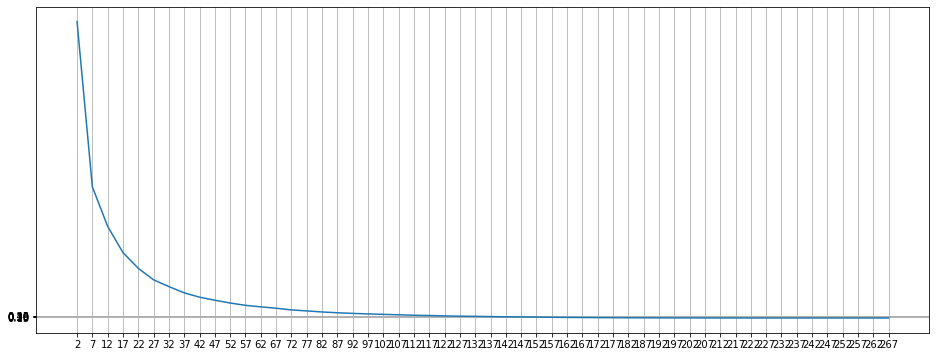

In [110]:
# Plot the each value of K vs the MSE at that value
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(possible_k_values, errors_per_k_mse)

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

37


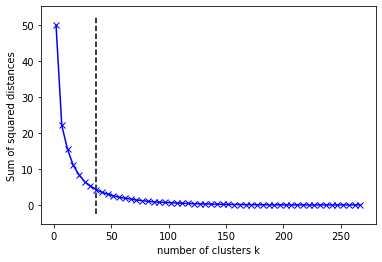

In [114]:
from kneed import KneeLocator
y = errors_per_k_mse
x = range(2, len(X)+1, 5)

kn = KneeLocator(x, y, S=1.0, curve='convex', direction='decreasing')
print(kn.knee)

import matplotlib.pyplot as plt
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(x, y, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [84]:
# Let's look at the values of K vs the silhouette score of running K-means with that value of k
list(zip(possible_k_values, errors_per_k))

[(2, 0.3976013323617051),
 (7, 0.32075936272711614),
 (12, 0.29228661689932345),
 (17, 0.320068343034408),
 (22, 0.32484551763897707),
 (27, 0.3437269877735734),
 (32, 0.3602797896069125),
 (37, 0.3790396737974508),
 (42, 0.3785323130768343),
 (47, 0.3848857157600197),
 (52, 0.39254205450464114),
 (57, 0.39667302616137884),
 (62, 0.39968888027258725),
 (67, 0.39801180074456405),
 (72, 0.4032417820790601),
 (77, 0.3903047518063845),
 (82, 0.3992804304428249),
 (87, 0.4054996809728651),
 (92, 0.4128605543386195),
 (97, 0.4045802267084612),
 (102, 0.4070782523563102),
 (107, 0.39840831184714404),
 (112, 0.3726007294920978),
 (117, 0.37692937293466044),
 (122, 0.38310787229495485),
 (127, 0.374112428231645),
 (132, 0.36745464644695836),
 (137, 0.36024165106334066),
 (142, 0.3477715523352019),
 (147, 0.3469096913959605),
 (152, 0.3240966221258521),
 (157, 0.32936807934165435),
 (162, 0.32227462306303345),
 (167, 0.3200581601729076),
 (172, 0.31395795760717726),
 (177, 0.30939705600279055),


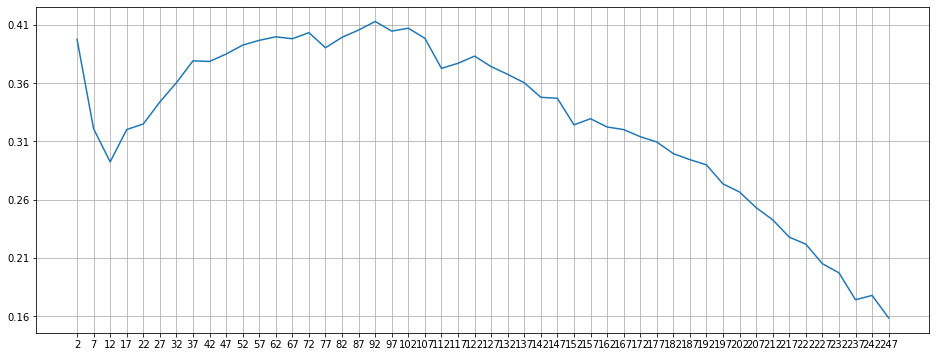

In [85]:
# Plot the each value of K vs the silhouette score at that value
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(possible_k_values, errors_per_k)

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

Looking at the graph above, good choices for k include 37, 72, 92, amongst other values. Increasing the number of clusters(k) beyond that range starts to result in worse clusters according to Silhouette score.

My pick would be k=37.

12


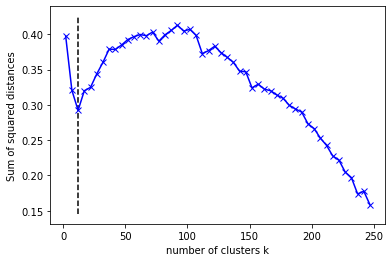

In [86]:
from kneed import KneeLocator
y = errors_per_k
x = range(2, 250, 5)

kn = KneeLocator(x, y, S=1.0, curve='convex', direction='decreasing')
print(kn.knee)

import matplotlib.pyplot as plt
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(x, y, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [87]:
# 37 clusters
predictions = KMeans(n_clusters=37, algorithm='full').fit_predict(sparse_ratings)

To visualize some of these clusters, we'll plot each cluster as a heat map:

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 26
# of users in cluster: 1302. # of users in plot: 50


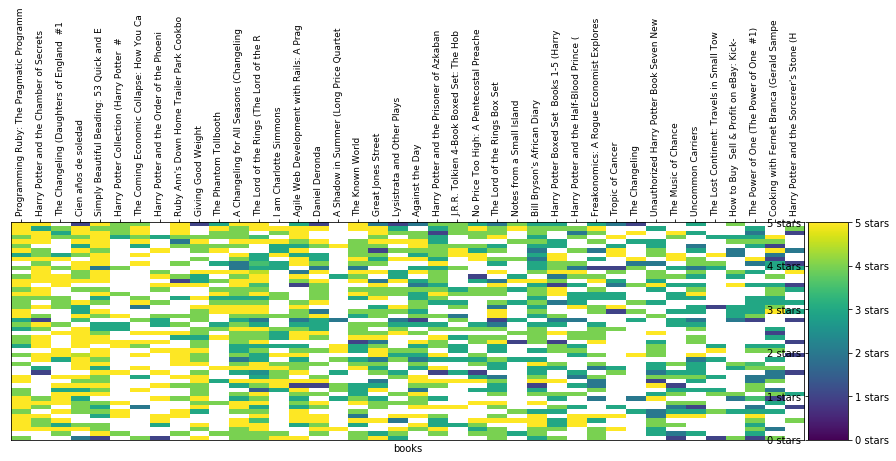

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 13
# of users in cluster: 1366. # of users in plot: 50


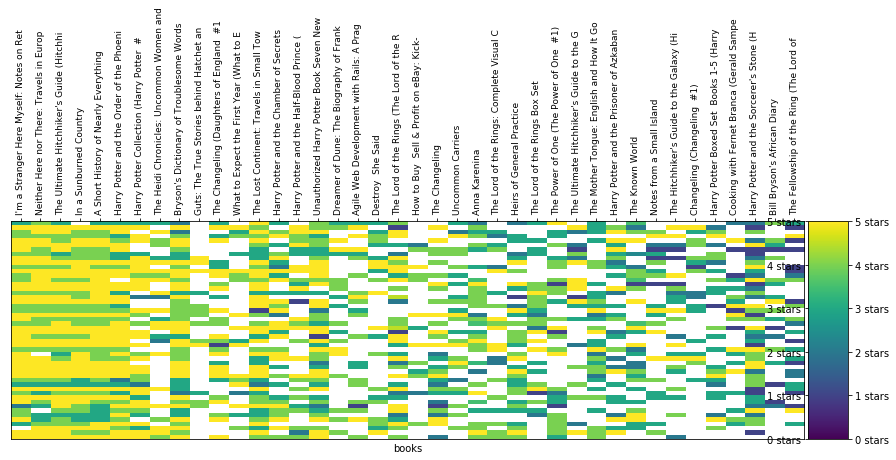

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 16
# of users in cluster: 5542. # of users in plot: 50


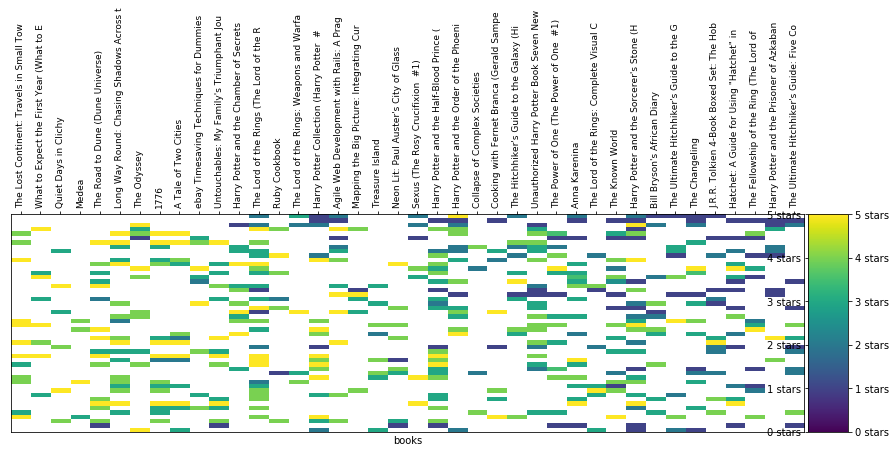

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 22
# of users in cluster: 852. # of users in plot: 50


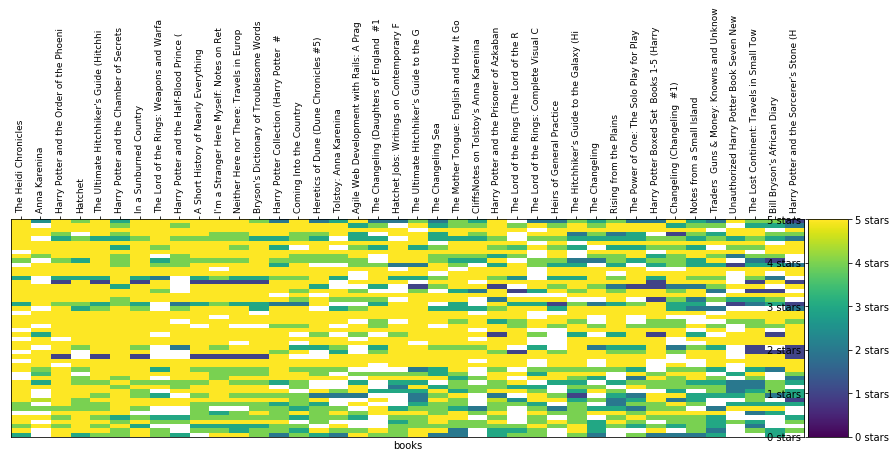

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 4
# of users in cluster: 2799. # of users in plot: 50


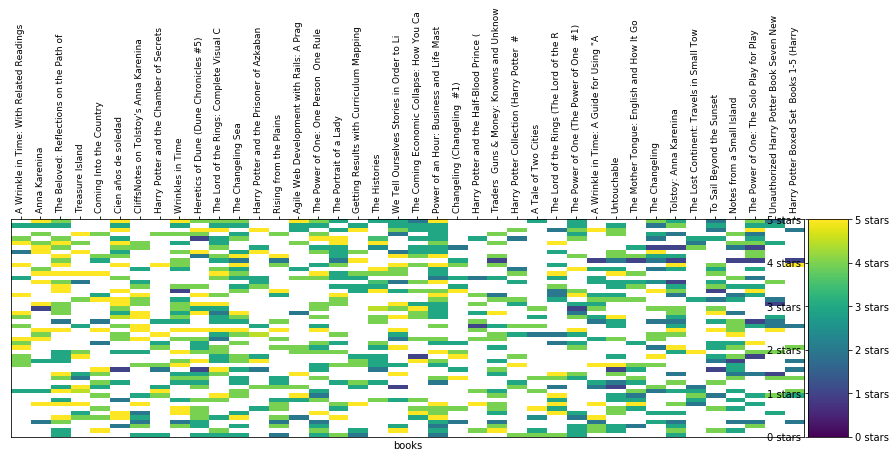

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 10
# of users in cluster: 1897. # of users in plot: 50


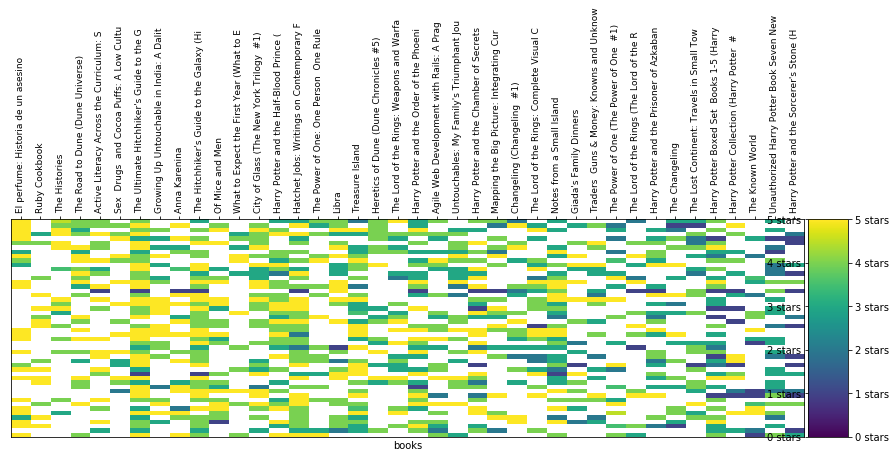

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 11
# of users in cluster: 1975. # of users in plot: 50


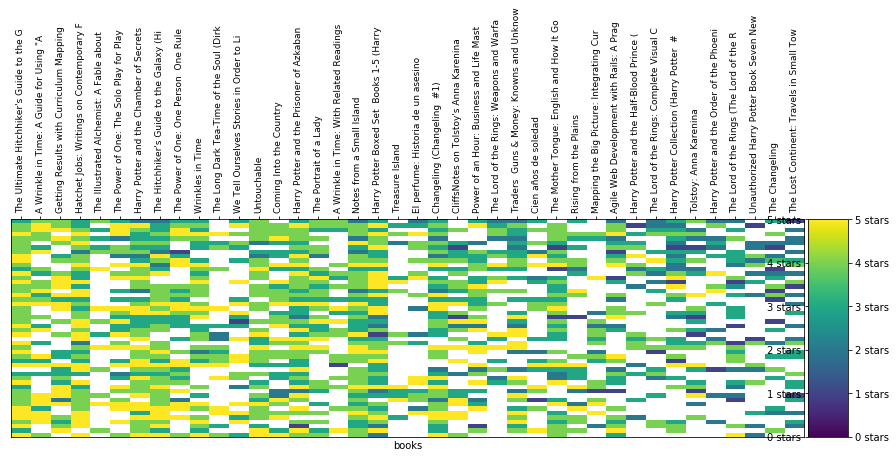

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 34
# of users in cluster: 1650. # of users in plot: 50


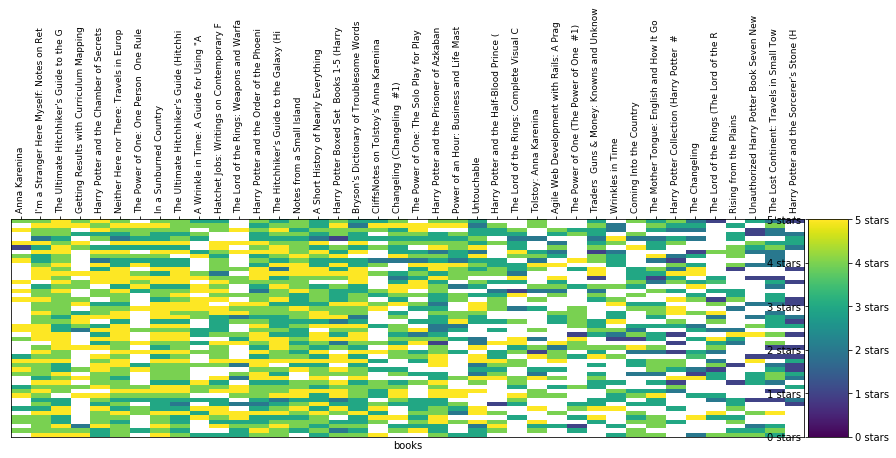

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 3
# of users in cluster: 1094. # of users in plot: 50


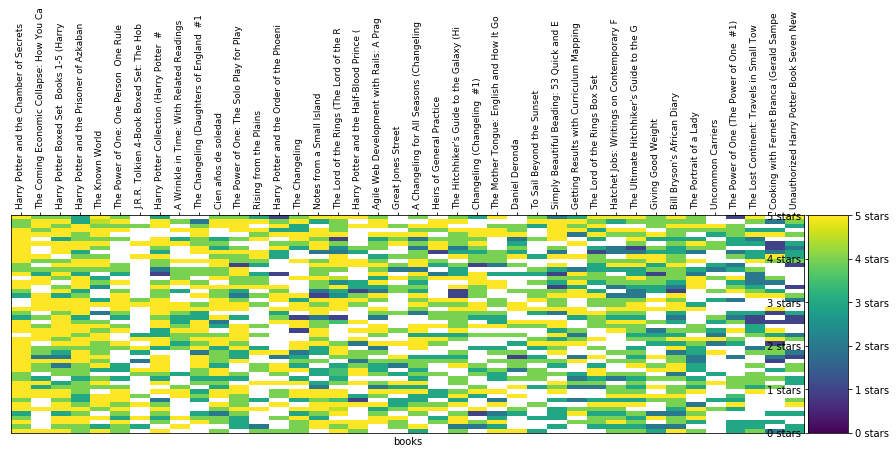

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 30
# of users in cluster: 1740. # of users in plot: 50


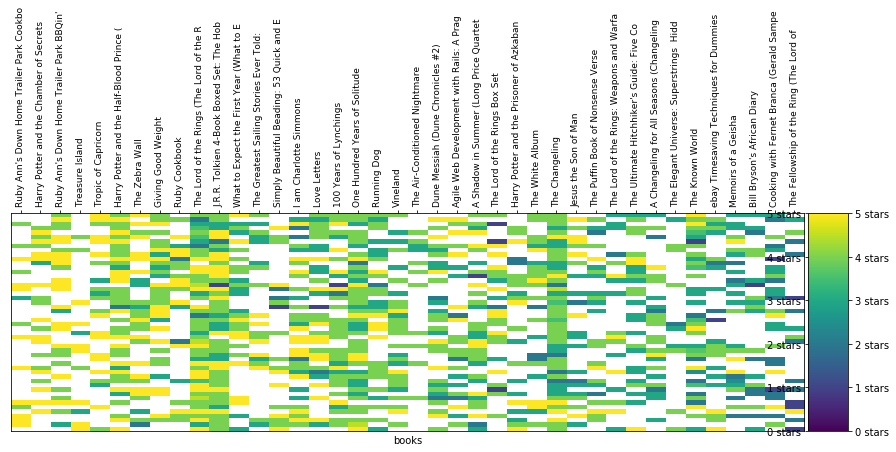

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 33
# of users in cluster: 2236. # of users in plot: 50


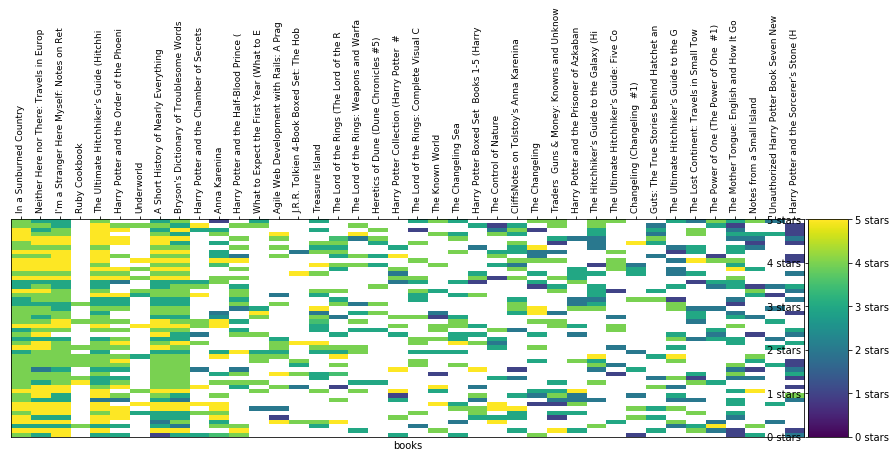

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 7
# of users in cluster: 1515. # of users in plot: 50


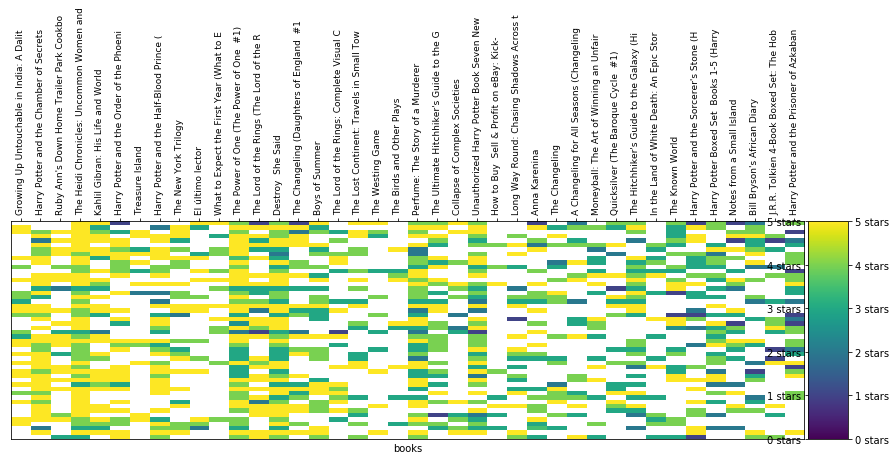

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 12
# of users in cluster: 1164. # of users in plot: 50


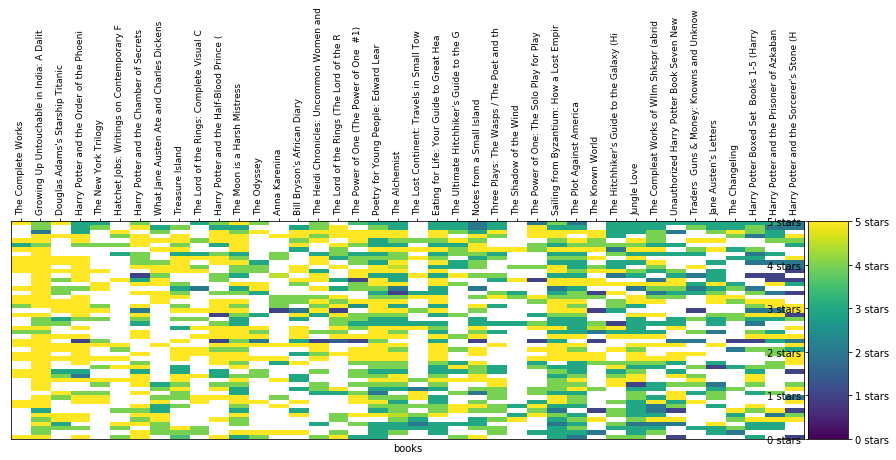

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 0
# of users in cluster: 2440. # of users in plot: 50


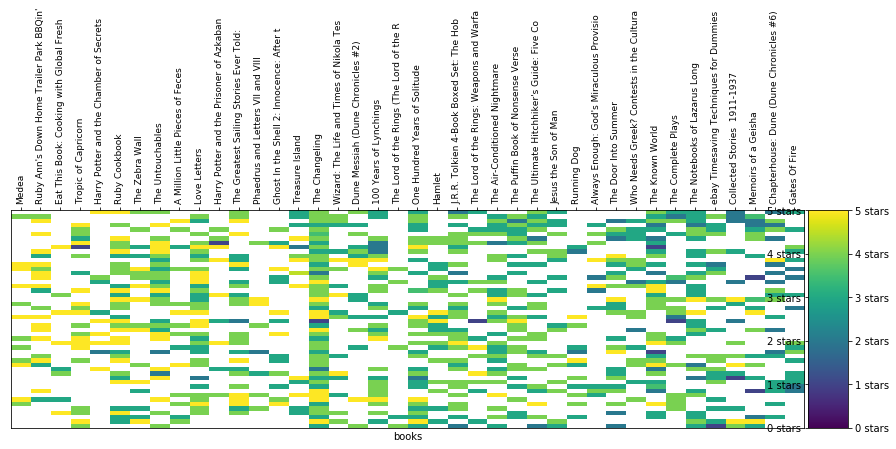

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 5
# of users in cluster: 1186. # of users in plot: 50


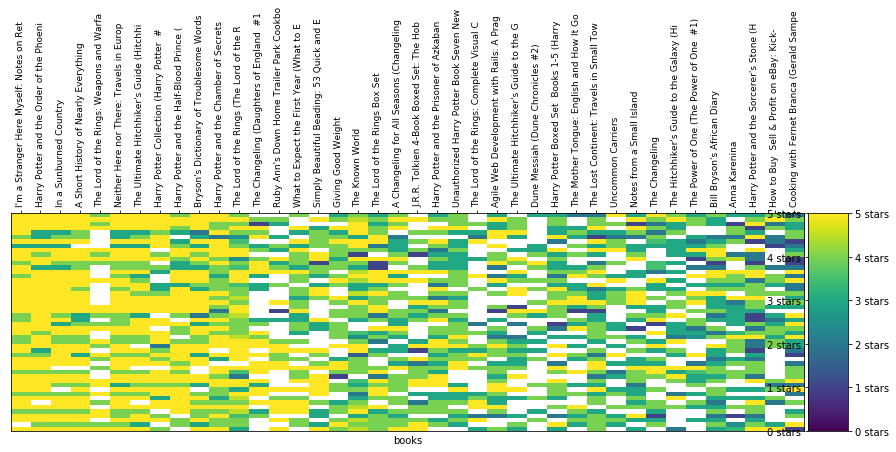

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 17
# of users in cluster: 830. # of users in plot: 50


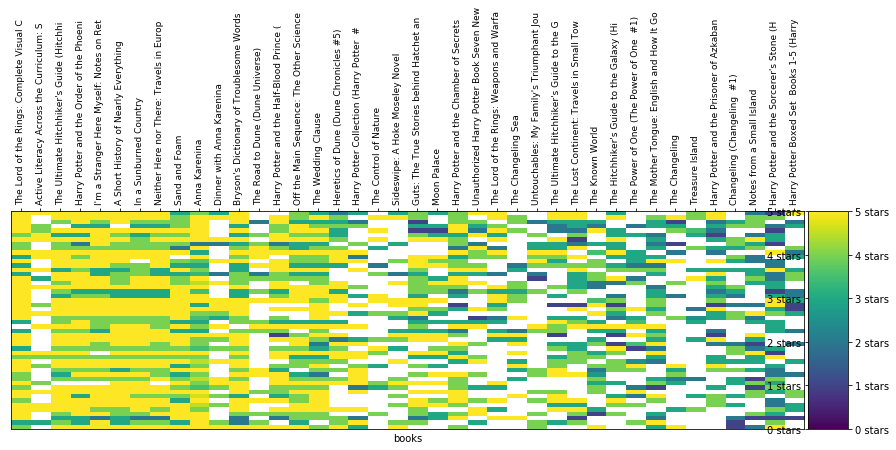

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 21
# of users in cluster: 1341. # of users in plot: 50


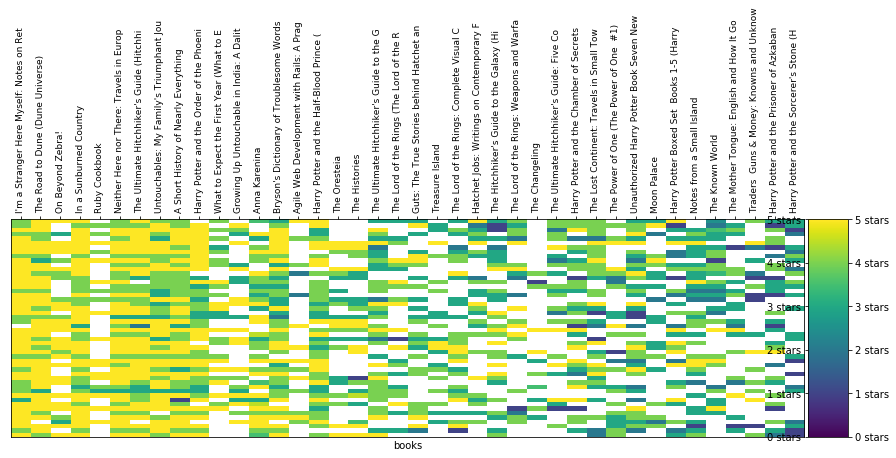

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 24
# of users in cluster: 1321. # of users in plot: 50


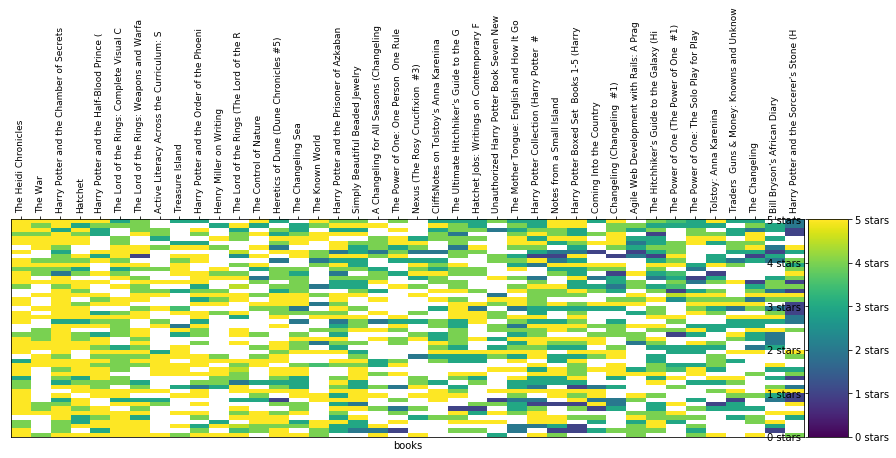

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 31
# of users in cluster: 1248. # of users in plot: 50


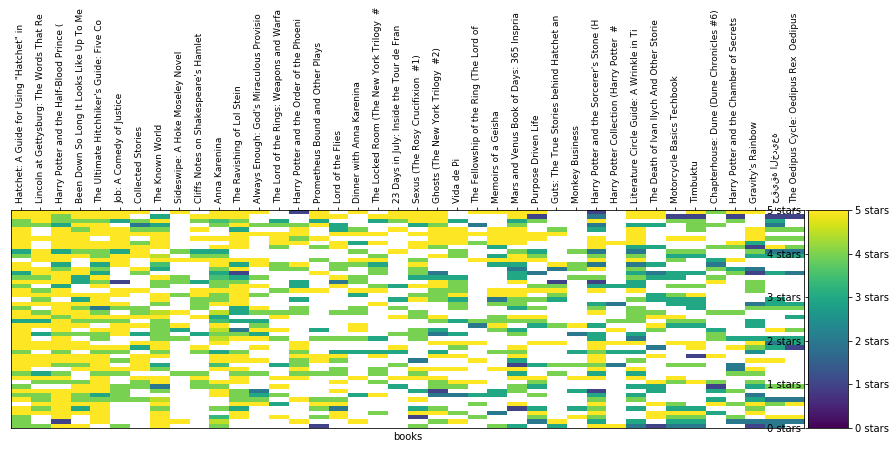

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 32
# of users in cluster: 1988. # of users in plot: 50


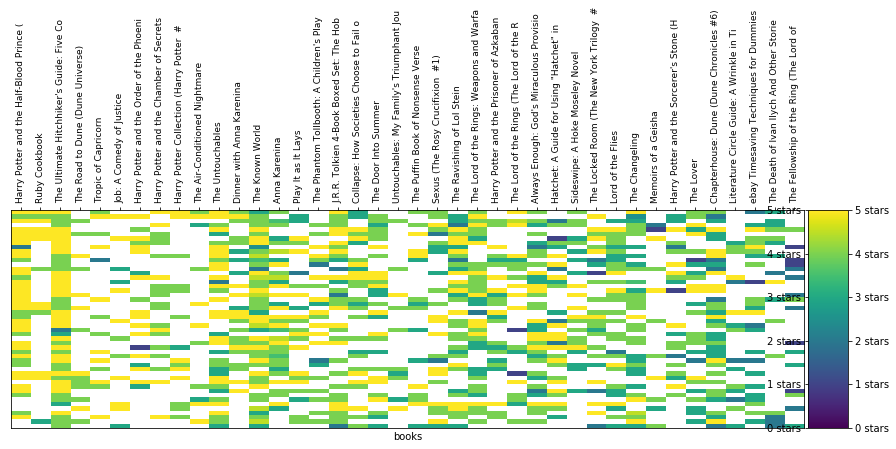

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 27
# of users in cluster: 1036. # of users in plot: 50


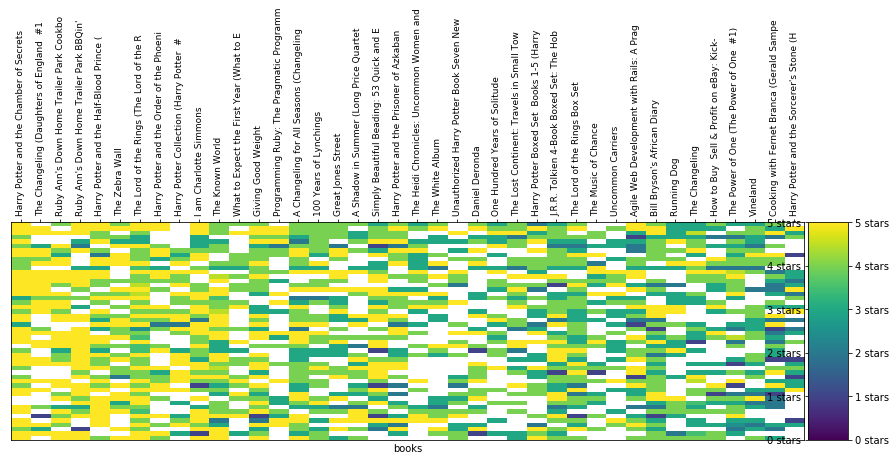

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 35
# of users in cluster: 895. # of users in plot: 50


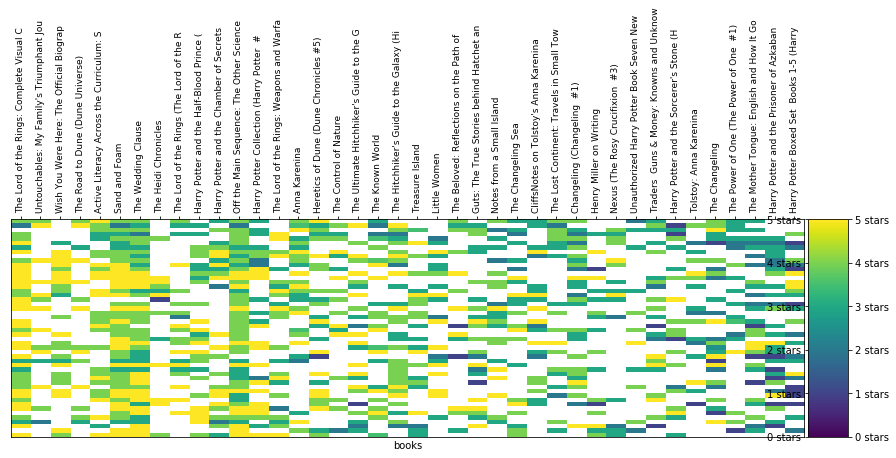

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 18
# of users in cluster: 1503. # of users in plot: 50


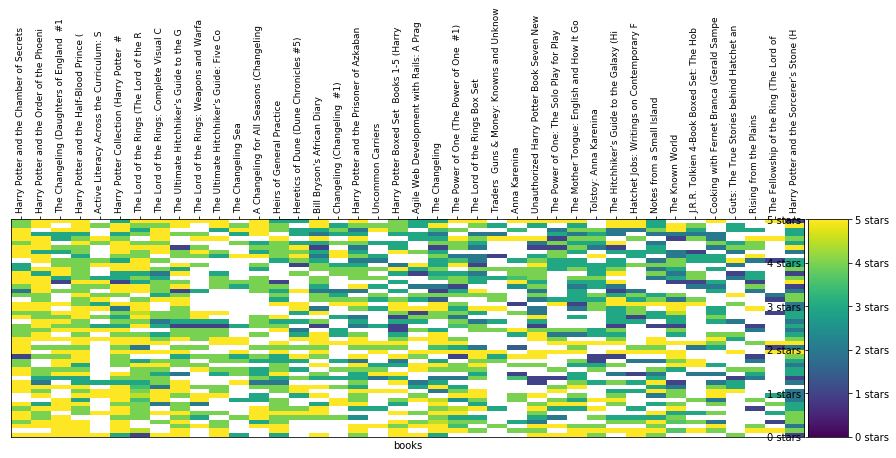

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 9
# of users in cluster: 1032. # of users in plot: 50


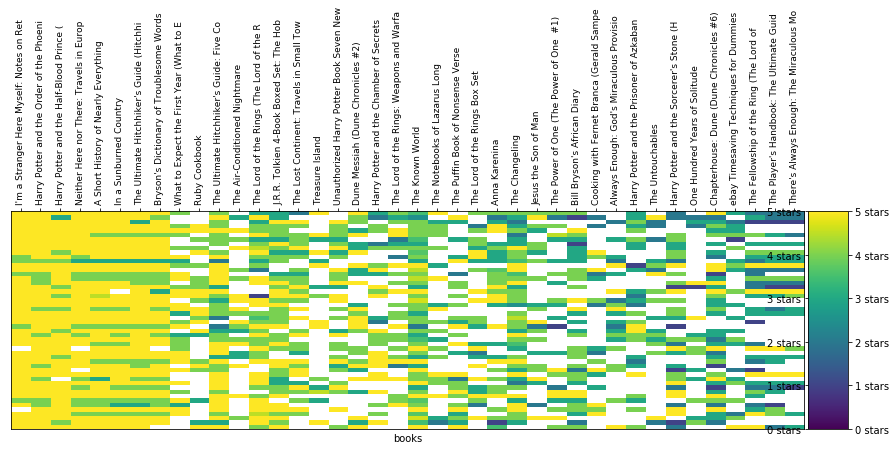

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 14
# of users in cluster: 889. # of users in plot: 50


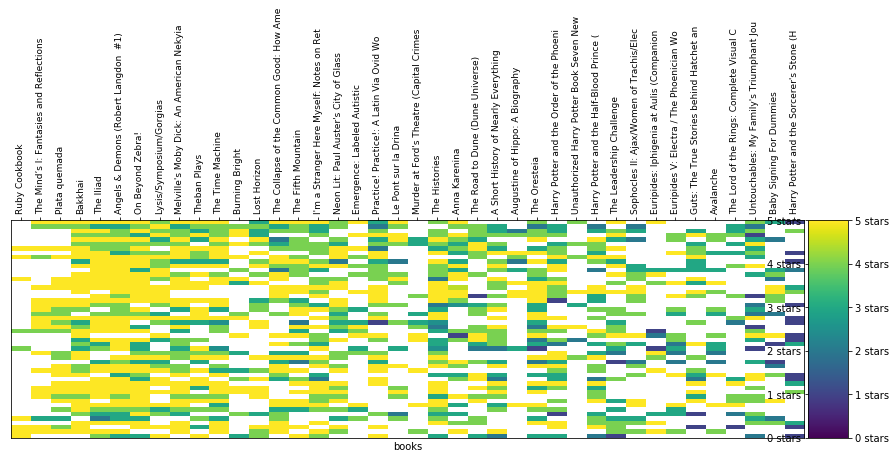

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 23
# of users in cluster: 962. # of users in plot: 50


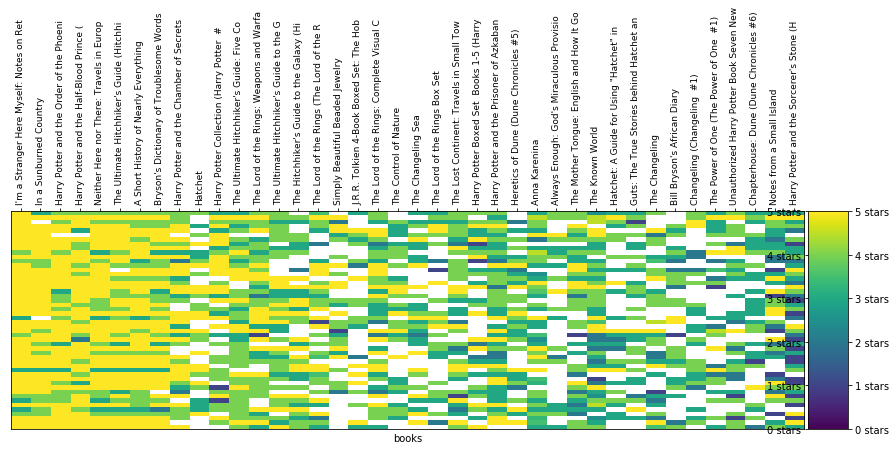

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 28
# of users in cluster: 284. # of users in plot: 50


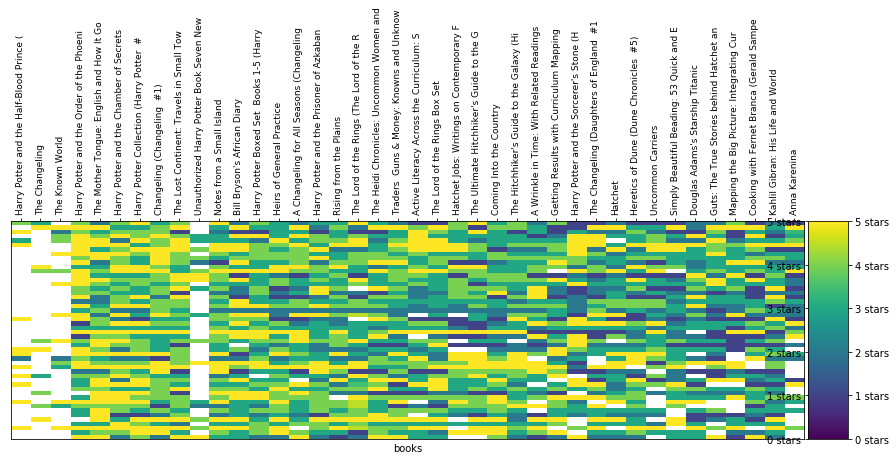

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 25
# of users in cluster: 1017. # of users in plot: 50


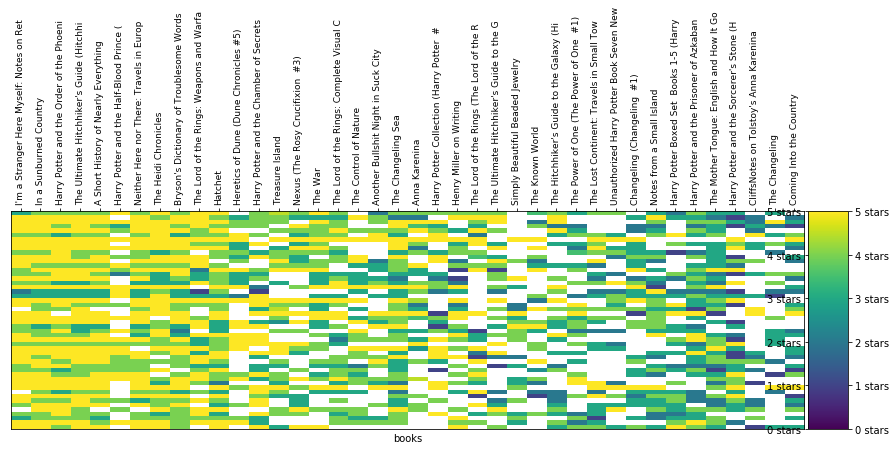

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 36
# of users in cluster: 1478. # of users in plot: 50


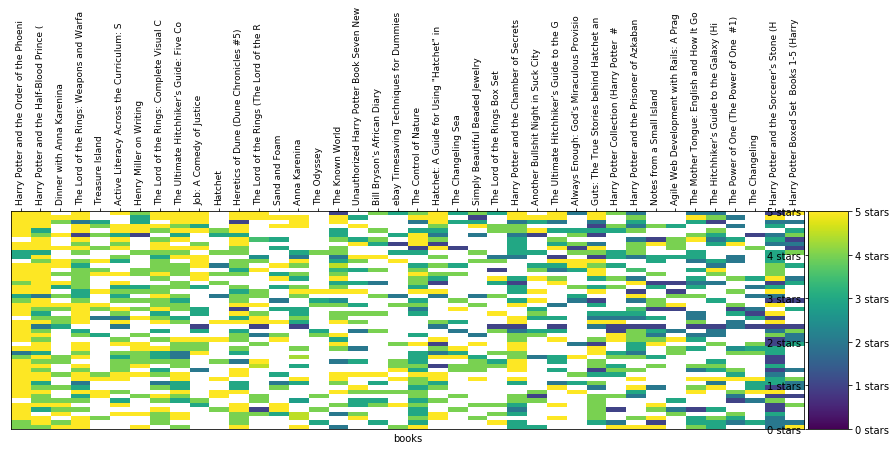

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 15
# of users in cluster: 1210. # of users in plot: 50


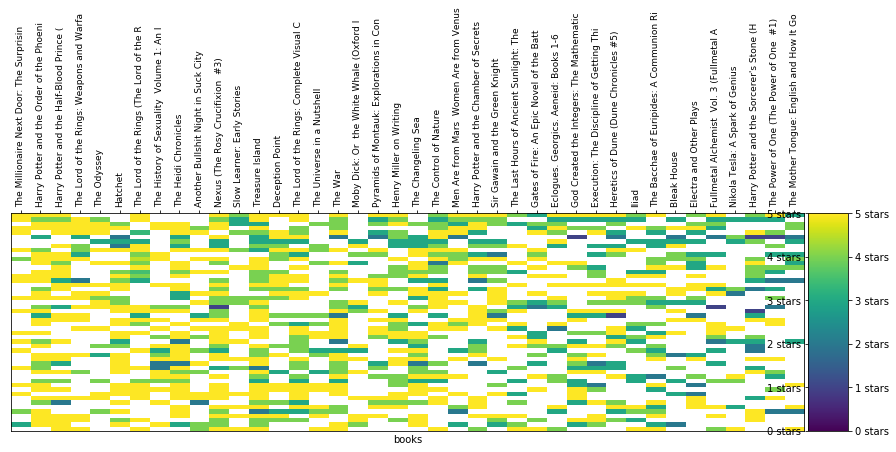

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 20
# of users in cluster: 1368. # of users in plot: 50


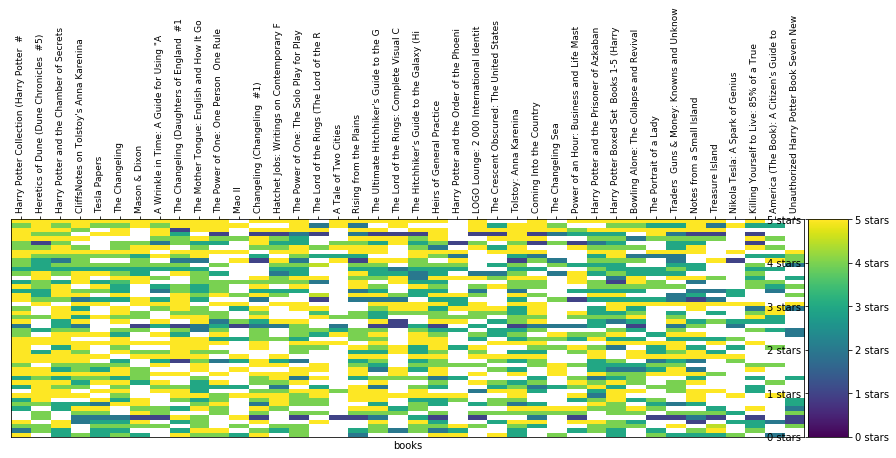

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 29
# of users in cluster: 1036. # of users in plot: 50


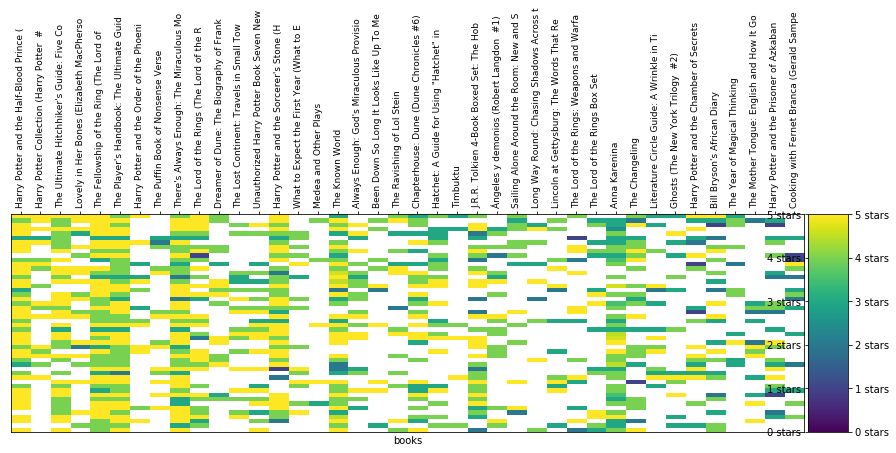

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 19
# of users in cluster: 610. # of users in plot: 50


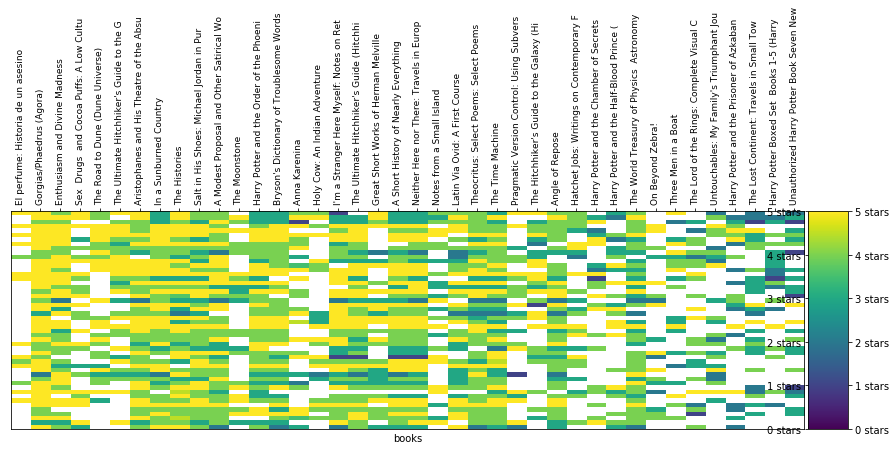

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 2
# of users in cluster: 1496. # of users in plot: 50


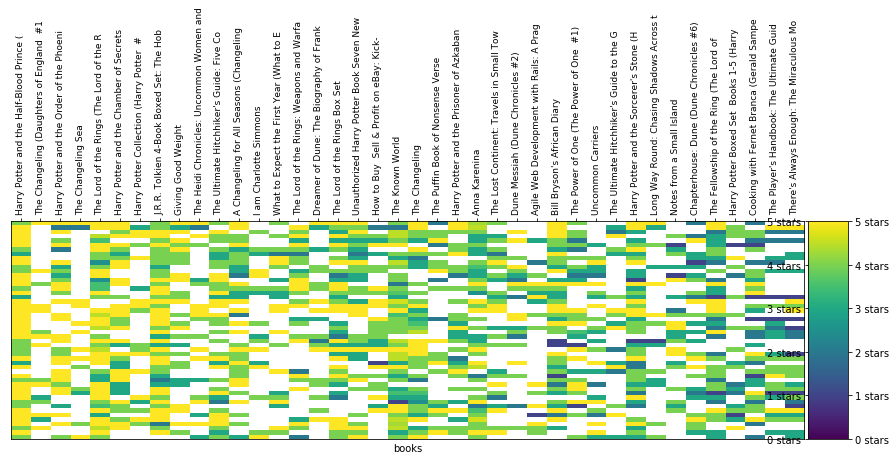

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 6
# of users in cluster: 1196. # of users in plot: 50


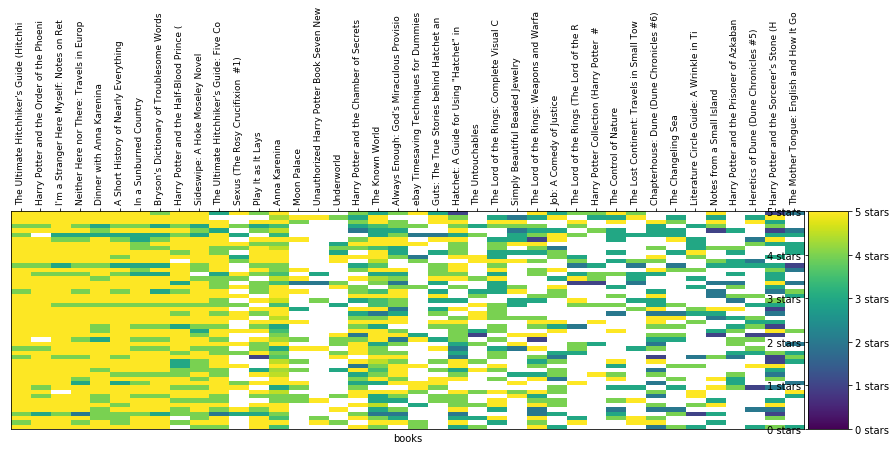

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 1
# of users in cluster: 1001. # of users in plot: 50


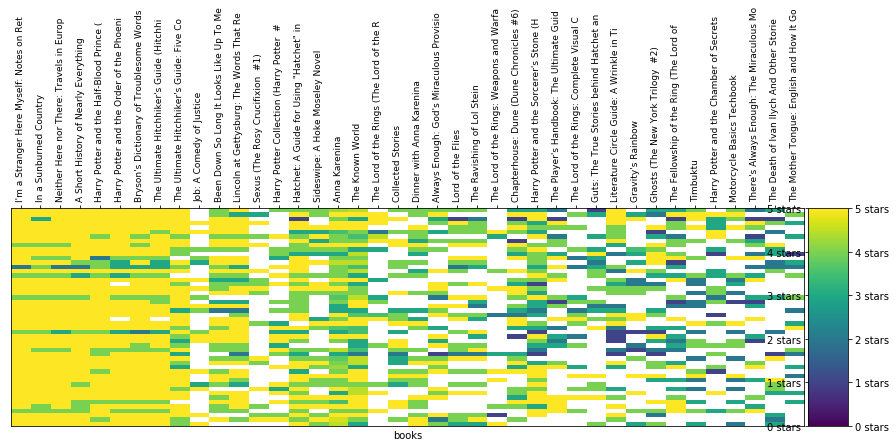

C:\python\capstone-project\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\python\capstone-project\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 8
# of users in cluster: 925. # of users in plot: 50


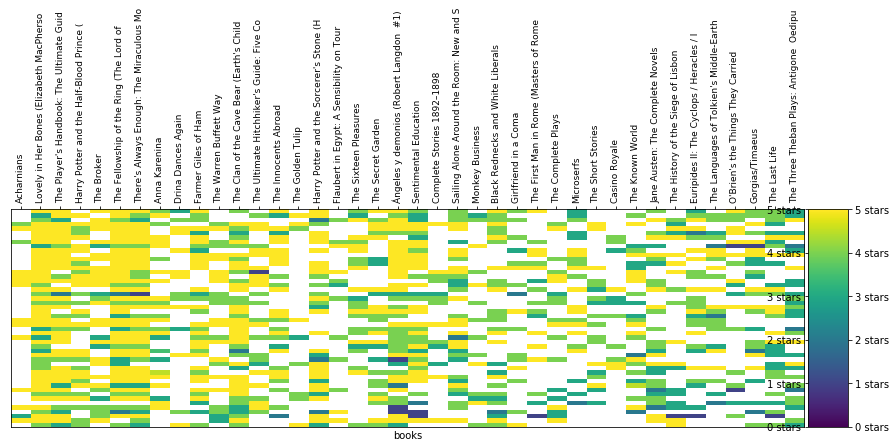

In [92]:
max_users = 50
max_books = 40

clustered = pd.concat([most_rated_books_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
helper.draw_book_clusters(clustered, max_users, max_books)

### Prediction
Let's pick a cluster and a specific user and see what useful things this clustering will allow us to do.

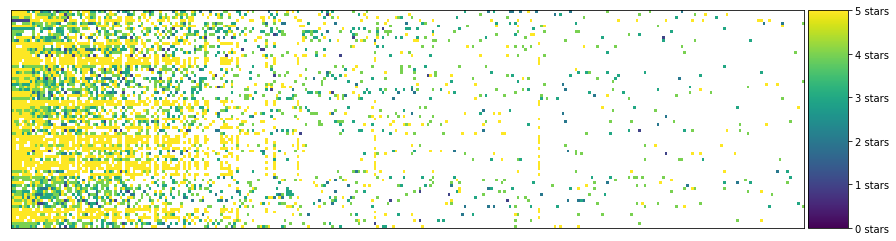

In [96]:
# Pick a cluster ID from the clusters above
cluster_number = 22

# Let's filter to only see the region of the dataset with the most number of values
n_users = 75
n_books = 300
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)

cluster = helper.sort_by_rating_density(cluster, n_books, n_users)
helper.draw_books_heatmap(cluster, axis_labels=False)

And the actual ratings in the cluster look like this:

In [97]:
cluster.fillna('').head(20)

,The Ultimate Hitchhiker's Guide (Hitchhiker's Guide to the Galaxy #1-5),In a Sunburned Country,Neither Here nor There: Travels in Europe,I'm a Stranger Here Myself: Notes on Returning to America After Twenty Years Away,Harry Potter and the Order of the Phoenix (Harry Potter #5),A Short History of Nearly Everything,Bryson's Dictionary of Troublesome Words: A Writer's Guide to Getting It Right,Harry Potter and the Chamber of Secrets (Harry Potter #2),The Mother Tongue: English and How It Got That Way,Harry Potter Collection (Harry Potter #1-6),...,Tales from Ovid,Harry Potter Schoolbooks Box Set: Two Classic Books from the Library of Hogwarts School of Witchcraft and Wizardry,The Story of Salt,Cryptonomicon,The Plot Against America,The Political Writings of St. Augustine,Tono-Bungay,Personal Injuries (Kindle County #5),Great Expectations,The Zebra Wall
358,5.0,5,5,5,5,5,3,,3,5,...,,,,,,,,,,
649,5.0,5,5,5,5,5,5,5,,5,...,,,,,,,,,,
386,4.0,4,4,5,5,4,4,5,,5,...,,,,,,,,,,
805,1.0,1,1,1,1,1,1,5,5,5,...,,,,,,,,,,
382,4.0,4,,,4,4,4,5,3,4,...,,2,,,,,,,,4
670,5.0,5,5,5,5,5,5,5,4,5,...,,5,,,,,,,,
234,3.0,3,3,3,3,3,3,3,3,,...,,,,,,,,,,
639,4.0,4,4,4,4,,,,4,,...,,,,,,,,,,
780,4.0,4,3,3,,,,,4,,...,,,,,,,,,,
227,4.0,,5,5,5,5,5,5,2,5,...,,,,,,,,,,


Blank cells in the table mean that user did not rate particular book. Since the user is in a cluster of users that seem to have similar taste, we can take the average of the votes for a book in the cluster and that would be a reasonable prediction that a user would enjoy the book.

In [98]:
# Fill in the name of the column/book
book_name = 'In a Sunburned Country'

cluster[book_name].mean()

4.54054054054054

And this would be our prediction for how she'd rate the book.

### Recommendation
Let's sum up what we did in the previous step. We have used k-means to cluster users according to their ratings. This lead us to clusters of users with similar ratings and thus generally a similar taste in books. Based on this, when one user did not have a rating for a certain book we averaged the ratings of all the other users in the cluster and that was our guess to how this one user would like the book.

Using the logic, if we calculate the average score in this cluster for every book, we'd have an understanding for how this taste cluster feels about book in the dataset.

In [103]:
# The average rating of 10 books as rated by the users in the cluster
cluster.mean().head(10)

The Ultimate Hitchhiker's Guide (Hitchhiker's Guide to the Galaxy #1-5)              4.533333
In a Sunburned Country                                                               4.540541
Neither Here nor There: Travels in Europe                                            4.462687
I'm a Stranger Here Myself: Notes on Returning to America After Twenty Years Away    4.578125
Harry Potter and the Order of the Phoenix (Harry Potter  #5)                         4.567164
A Short History of Nearly Everything                                                 4.542857
Bryson's Dictionary of Troublesome Words: A Writer's Guide to Getting It Right       4.348485
Harry Potter and the Chamber of Secrets (Harry Potter  #2)                           4.727273
The Mother Tongue: English and How It Got That Way                                   4.095238
Harry Potter Collection (Harry Potter  #1-6)                                         4.523077
dtype: float64

This becomes really useful for us because we can now use it as a recommendation system that enables our users to discover books they're likely to enjoy.

When a user logs in to our app, we can now show them recommendations that are appropriate to their taste. The formula for these recommendations is to select the cluster's highest-rated books that the user did not rate yet.

In [ ]:
#test_cluster = clustered[clustered.group == 6].drop(['index', 'group'], axis=1)
#test_cluster.loc[12874, :]

In [105]:
# Pick a user_id from the dataset
user_id = 358

# Get all this user's ratings
user_ratings = cluster.loc[user_id, :]

# Which books did they not rate?
user_unrated_books = user_ratings[user_ratings.isnull()]

# What are the ratings of books the user did not rate?
avg_ratings = pd.concat([user_unrated_books, cluster.mean()], axis=1, join='inner').loc[:,0]

# Let's sort by rating so the highest rated books are presents first
#pd.set_option('display.max_rows', None)
avg_ratings.sort_values(ascending=False)[:15]

Little Women                                                  5.000000
Phaedrus                                                      5.000000
Lincoln at Gettysburg: The Words That Remade America          5.000000
Corelli's Mandolin                                            5.000000
Into the Wild                                                 5.000000
Trump: The Art of the Deal                                    5.000000
Gates of Fire: An Epic Novel of the Battle of Thermopylae     5.000000
Metamorphoses                                                 5.000000
The Kite Runner                                               5.000000
A Book of Common Prayer                                       4.818182
Love Letters                                                  4.750000
Harry Potter and the Chamber of Secrets (Harry Potter  #2)    4.727273
Mason & Dixon                                                 4.678571
Lysistrata                                                    4.666667
The Se